In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('modulo_results/benchmark_lzc_simd_2023-07-22_20-05-32.tsv', sep='\t')
df.columns

Index(['device', 'compiler', 'version', 'arch-flags', 'rep', 'target',
       'operation', 'variant', 'type', 'vectorsize', 'datasize',
       'offloading_and_execution_time', 'execution_time [ns]',
       'throughput [MiB/s]', 'data@10', 'mod@10', 'results@10',
       'flush_data@10', 'flush_results@10'],
      dtype='object')

In [3]:
mean_df = df.groupby(['device', 'compiler', 'version', 'arch-flags', 'target', 'operation', 'variant', 'type', 'vectorsize', 'datasize']).mean()["execution_time [ns]"].reset_index()
  # Calculate the throughput in GiB/s
mean_df["throughput (GiB/s)"] = (mean_df["datasize"] /(1024*1024*1024)) / (mean_df["execution_time [ns]"]/1e9)

/tmp/ipykernel_97850/3100047137.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby(['device', 'compiler', 'version', 'arch-flags', 'target', 'operation', 'variant', 'type', 'vectorsize', 'datasize']).mean()["execution_time [ns]"].reset_index()


In [4]:
mean_df

,device,compiler,version,arch-flags,target,operation,variant,type,vectorsize,datasize,execution_time [ns],throughput (GiB/s)
0,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by column,Cache Load,uint32_t,256,4294967296,1.318384e+09,3.034017
1,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by column,Cache Load,uint64_t,256,4294967296,1.324128e+09,3.020855
2,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by column,Stream Load,uint32_t,256,4294967296,1.189592e+09,3.362497
3,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by column,Stream Load,uint64_t,256,4294967296,1.237983e+09,3.231061
4,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by value,Cache Load,uint32_t,256,4294967296,9.108540e+08,4.391483
5,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by value,Cache Load,uint64_t,256,4294967296,9.584781e+08,4.173282
6,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by value,Stream Load,uint32_t,256,4294967296,9.405108e+08,4.253008
7,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX,modulo by value,Stream Load,uint64_t,256,4294967296,9.938572e+08,4.024723
8,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX512,modulo by column,Cache Load,uint32_t,512,4294967296,1.260703e+09,3.172833
9,Intel(R) Xeon(R) Gold 6240R CPU @ 2.40GHz,CLANG,15.0.7,all,AVX512,modulo by column,Cache Load,uint64_t,512,4294967296,1.252869e+09,3.192673


/tmp/ipykernel_97850/447760072.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


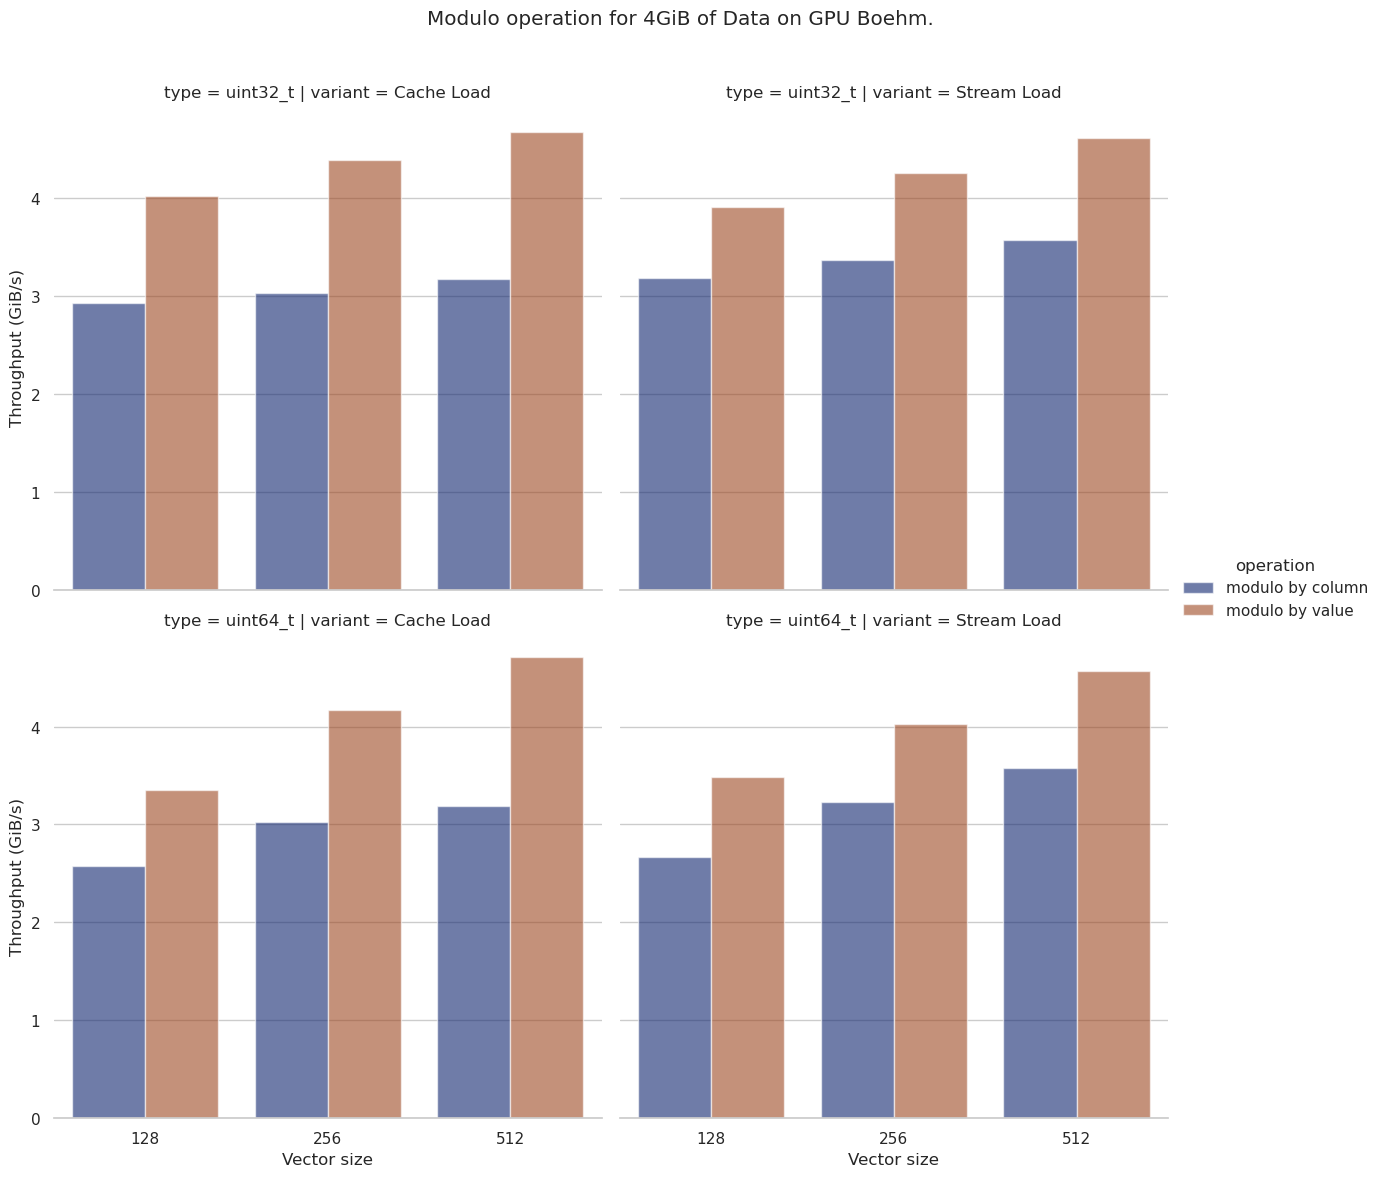

In [14]:
import seaborn as sns

# Bar plot with vector size on x-axis and throughput on y-axis, with hue for the kind of operation and hatch "\\" for variant == "Cache Load" and hatch "//" for variant "Stream Load"
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=mean_df, kind="bar",
    x="vectorsize", y="throughput (GiB/s)",
    hue="operation", col="variant", row="type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Vector size", "Throughput (GiB/s)")
#set the plot title
g.fig.suptitle("Modulo operation for 4GiB of Data on GPU Boehm.")
# set title above the plot
g.fig.subplots_adjust(top=0.9)
#save the plot
g.savefig("modulo_results/modulo_benchmark_lzc_simd_2023-07-22_20-05-32.png")

